In [1]:
import pandas as pd
import numpy as numpy
from sklearn.utils import shuffle
import random
import sklearn 
import nltk
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
import matplotlib
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [2]:
TrainDF = pd.read_csv("/home/user/Desktop/GreyAtom/Notebook/train.csv")
TrainDF.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [3]:
TrainDF.sentiment.value_counts()

1    4311
2    2382
0     456
3     125
Name: sentiment, dtype: int64

In [4]:
TrainDF['pre_clean_len'] = [len(str(t)) for t in TrainDF.tweet] 

# created new column pre_clean_len in dataframe which will give length of each tweet i.e characters in tweet

In [5]:
TrainDF.head()

,tweet_id,tweet,sentiment,pre_clean_len
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,89
1,1851,Learning ab Google doodles! All doodles should...,1,143
2,2689,one of the most in-your-face ex. of stealing t...,2,132
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,125
4,3604,Line outside the Apple store in Austin waiting...,1,77


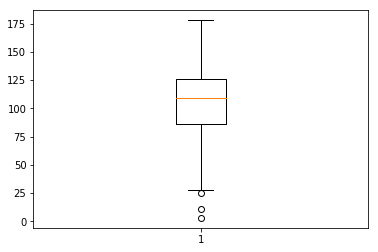

In [6]:
plt.boxplot(TrainDF.pre_clean_len)
plt.show()



# plot pre clean length  

In [7]:
TrainDF.shape

(7274, 4)

In [8]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer


tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'        # remove @ mentions fron tweets

pat2 = r'https?://[^ ]+'        # remove URL's from tweets

combined_pat = r'|'.join((pat1, pat2)) #addition of pat1 and pat2

www_pat = r'www.[^ ]+'         # remove URL's from tweets

negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",   # converting words like isn't to is not
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}

neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner(text):  # define tweet_cleaner function to clean the tweets
    soup = BeautifulSoup(text, 'lxml')    # call beautiful object
    souped = soup.get_text()   # get only text from the tweets 
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")    # remove utf-8-sig codeing
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed) # calling combined_pat
    stripped = re.sub(www_pat, '', stripped) #remove URL's
    lower_case = stripped.lower()      # converting all into lower case
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case) # converting word's like isn't to is not
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)       # will replace # by space
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1] # Word Punct Tokenize and only consider words whose length is greater than 1
    return (" ".join(words)).strip() # join the words

In [9]:
nums = [0,2000,4000,6000,7274] #used for batch process tweets
clean_tweet = [] #initialize list
for i in range(nums[0],nums[4]):
    clean_tweet.append(tweet_cleaner(str(TrainDF['tweet'][i]))) # call tweet_cleaner function and pass parameter as all the tweets to clean the tweets and append cleaned tweets into clean_tweet_texts list

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
word_tokens = [] # initialize list for tokens
for word in clean_tweet:  # for each word in clean_tweet_texts
    word_tokens.append(word_tokenize(word)) #tokenize word in clean_tweet_texts and append it to word_tokens list

In [12]:
# stemming


from nltk.stem import PorterStemmer
df = [] 
Porter_stemmer = PorterStemmer()
for l in word_tokens:
    b = [Porter_stemmer.stem(q) for q in l]
    df.append(b)

In [13]:
TrainDF

,tweet_id,tweet,sentiment,pre_clean_len
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,89
1,1851,Learning ab Google doodles! All doodles should...,1,143
2,2689,one of the most in-your-face ex. of stealing t...,2,132
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,125
4,3604,Line outside the Apple store in Austin waiting...,1,77
5,966,#technews One lone dude awaits iPad 2 at Apple...,1,115
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1,82
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1,119
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2,46
9,883,I think I might go all weekend without seeing ...,2,79


In [14]:
clean_df =[] # initialize list clean_df to join word tokens after lemmatization
for c in df:  # for loop for each list in df
    a = " ".join(c) # join words in list with space in between and giev it to a
    clean_df.append(a) # append a to clean_df

In [15]:
clean_df

['sxswnui sxsw appl defin languag of touch with differ dialect becom smaller',
 'learn ab googl doodl all doodl should be light funni innov with except for signific occas googledoodl sxsw',
 'one of the most in your face ex of steal the show in yr rt at sxsw appl school the mkt expert link',
 'thi iphon sxsw app would pretti awesom if it did not crash everi min dure extend brows fuckit illmakeitwork',
 'line outsid the appl store in austin wait for the new ipad sxsw link',
 'technew one lone dude await ipad at appl sxsw store link tech news appl ipad sxsw tablet tech',
 'sxsw tip princ npr video toy shop with zuckerberg link sxsw ipad',
 'nu user rt new ubersoci for iphon now in the app store includ uberguid to sxsw sponsor by mashabl',
 'free sxsw sampler on itun link freemus',
 'think might go all weekend without see the same ipad case twice sxsw',
 'rt offici sxsw app sxsw go bit ly hmiiga android iphon ipad',
 'it offici buy an ipad sxsw elev',
 'they re give away ipad box and book

In [16]:
clean_df1 = pd.DataFrame(clean_df,columns=['text']) # convert clean_tweet_texts into dataframe and name it as clean_df
clean_df1['target'] = TrainDF.sentiment # from earlier dataframe get the sentiments of each tweet and make a new column in clean_df as target and give it all the sentiment scores

In [17]:
clean_df1

,text,target
0,sxswnui sxsw appl defin languag of touch with ...,1
1,learn ab googl doodl all doodl should be light...,1
2,one of the most in your face ex of steal the s...,2
3,thi iphon sxsw app would pretti awesom if it d...,0
4,line outsid the appl store in austin wait for ...,1
5,technew one lone dude await ipad at appl sxsw ...,1
6,sxsw tip princ npr video toy shop with zuckerb...,1
7,nu user rt new ubersoci for iphon now in the a...,1
8,free sxsw sampler on itun link freemus,2
9,think might go all weekend without see the sam...,2


In [18]:
clean_df1.shape

(7274, 2)

In [19]:
clean_df1['clean_len'] = [len(t) for t in clean_df1.text] 


# Again make a new coloumn in the dataframe and name it as clean_len which will 
# store thw number of words in the tweet


In [20]:
clean_df1[clean_df1.clean_len > 140].head(10) 

# if any tweet is more than 140 characters

,text,target,clean_len


In [21]:
X = clean_df1.text # test data
y = clean_df1.target # target data


print(X.shape)
print(y.shape)

(7274,)
(7274,)


In [22]:
from sklearn.cross_validation import train_test_split 
#from sklearn.cross_validation import train_test_split to split the data into training and tesing set


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0) 

# split the data into traing and testing set where ratio is 80:20
# X_train is the tweets of training data, X_test is the testing tweets which we have to predict, y_train is the sentiments of tweets in the traing data and y_test is the sentiments of the tweets  which we will use to measure the accuracy of the model

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
vect = TfidfVectorizer(analyzer = "word", ngram_range=(1,3)) 

# Get Tf-idf object and save it as vect. We can select features from here we just have simply change 
#the ngram range to change the features also we can remove stop words over here with the help of stop parameter

In [24]:
vect.fit(X_train) 
# fit or traing data tweets to vect

X_train_dtm = vect.transform(X_train) 
# transform our training data tweets

In [25]:
X_test_dtm = vect.transform(X_test)
# transform our testing data tweets

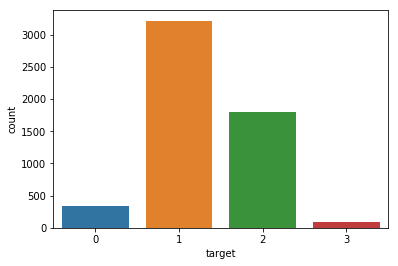

In [26]:
import seaborn as sns

sns.countplot(y_train)
plt.show()

In [126]:
# All the models

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

# metrics
from sklearn.metrics import accuracy_score,precision_score, precision_recall_curve, f1_score, roc_auc_score, recall_score

#hyper-parameter tuning
from sklearn.model_selection import GridSearchCV

In [88]:
def fitAndPredict(model, X_train_dtm, X_test_dtm, y_train, y_test):
    model.fit(X_train_dtm, y_train)
    y_pred = model.predict(X_test_dtm)
    accuracyscore = accuracy_score(y_test, y_pred)
    precisionscore = precision_score(y_test, y_pred, average='macro')
    f1score = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='macro')
    print("Accuracy Score:{}".format(accuracyscore))
    print("Precision Score:{}".format(precisionscore))
    print("F1 Score:{}".format(f1score))
    print("Recall:{}".format(recall))
    return accuracyscore, precisionscore, f1score, recall
#   print("ROC score:{}".format(roc_auc_score())

## Random Froest Classifier

In [89]:
rf = RandomForestClassifier(random_state=0)
rf_metrics = fitAndPredict(rf, X_train_dtm, X_test_dtm, y_train, y_test)

Accuracy Score:0.6553051126992854
Precision Score:0.5150037792894936
F1 Score:0.6151012035087213
Recall:0.35447035373808483


## Decision Tree

In [73]:
dt = DecisionTreeClassifier(random_state=0)
dt_metrics = fitAndPredict(dt, X_train_dtm, X_test_dtm, y_train, y_test)

Accuracy Score:0.5860362836723474
Precision Score:0.3791734642214221
F1 Score:0.5844945275504706
Recall:0.375457587435707


## Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression() 
lr_metrics = fitAndPredict(lr, X_train_dtm, X_test_dtm, y_train, y_test)

Accuracy Score:0.6663001649257834
Precision Score:0.4914489589198217
F1 Score:0.6180507726194394
Recall:0.3236362644633251


/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Gradient Boosting

In [80]:
GB = GradientBoostingClassifier() 
GB_metrics = fitAndPredict(GB, X_train_dtm, X_test_dtm, y_train, y_test)

Accuracy Score:0.6734469488730072
Precision Score:0.4651590488293522
F1 Score:0.6350559328374702
Recall:0.35727055254966794


## Voting Classifier

In [128]:
clf1 = RandomForestClassifier()
clf2 = DecisionTreeClassifier()
clf3 = LogisticRegression()
clf4 = GradientBoostingClassifier()

vc = VotingClassifier([('rf', clf1), ('dt', clf2), ('lr', clf3), ('GB', clf4)], voting='hard')
vc_metrics = fitAndPredict(vc, X_train_dtm, X_test_dtm, y_train, y_test)

Accuracy Score:0.6608026388125343
Precision Score:0.47901299769527084
F1 Score:0.6062096429775964
Recall:0.34605571116277556


/home/user/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Linear SVM

In [130]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm_metrics = fitAndPredict(svm, X_train_dtm, X_test_dtm, y_train, y_test)

Accuracy Score:0.6778449697636064
Precision Score:0.4985459862088163
F1 Score:0.6652566817206568
Recall:0.40715666800044287


In [131]:
df_binary_metrics = pd.DataFrame({"Random Forest":rf_metrics, "Decision Tree":dt_metrics, "Logistic Regression":lr_metrics, "Gradient Boosting": GB_metrics, "Voting Classifier": vc_metrics, "Linear SVC": svm_metrics}, index=['accuracy_score', 'precision_score', 'f1score', 'recall'])
df_binary_metrics

,Random Forest,Decision Tree,Logistic Regression,Gradient Boosting,Voting Classifier,Linear SVC
accuracy_score,0.655305,0.586036,0.666300,0.673447,0.660803,0.677845
precision_score,0.515004,0.379173,0.491449,0.465159,0.479013,0.498546
f1score,0.615101,0.584495,0.618051,0.635056,0.606210,0.665257
recall,0.354470,0.375458,0.323636,0.357271,0.346056,0.407157


# One vs Rest Classifier

In [90]:
over_rf = OneVsRestClassifier(RandomForestClassifier(random_state=0, n_jobs=-1))
ovr_rf_metrics = fitAndPredict(over_rf, X_train_dtm, X_test_dtm, y_train, y_test)

Accuracy Score:0.6536558548653106
Precision Score:0.5136573749415614
F1 Score:0.624798336861849
Recall:0.3685073410311851


In [91]:
ovr_dt = OneVsRestClassifier(DecisionTreeClassifier())
ovr_dt_metrics = fitAndPredict(ovr_dt, X_train_dtm, X_test_dtm, y_train, y_test)

Accuracy Score:0.5211654755360088
Precision Score:0.4012557062555543
F1 Score:0.5552227986050026
Recall:0.35036975857841723


In [92]:
ovr_lr = OneVsRestClassifier(LogisticRegression())
ovr_lr_metrics = fitAndPredict(ovr_lr, X_train_dtm, X_test_dtm, y_train, y_test)

Accuracy Score:0.6663001649257834
Precision Score:0.4914489589198217
F1 Score:0.6180507726194394
Recall:0.3236362644633251


/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [93]:
ovr_gb = OneVsRestClassifier(GradientBoostingClassifier())
ovr_gb_metrics = fitAndPredict(ovr_gb, X_train_dtm, X_test_dtm, y_train, y_test)

Accuracy Score:0.6553051126992854
Precision Score:0.46109785400495523
F1 Score:0.6135452619243005
Recall:0.34740686032529977


In [135]:
ovr_svc = OneVsRestClassifier(LinearSVC())
ovr_svc_metrics = fitAndPredict(ovr_svc, X_train_dtm, X_test_dtm, y_train, y_test)

Accuracy Score:0.6778449697636064
Precision Score:0.4985459862088163
F1 Score:0.6652566817206568
Recall:0.40715666800044287


In [79]:
gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(X_train_dtm, y_train)
gbc_score = gbc.score(X_test_dtm, y_test)
gbc_score

0.6723474436503574

In [136]:
df_binary_metrics1 = pd.DataFrame({"Random Forest":ovr_rf_metrics, "Decision Tree":ovr_dt_metrics, "Logistic Regression":ovr_lr_metrics, "Gradient Boosting": ovr_gb_metrics, "Linear SVC": ovr_svc_metrics}, index=['accuracy_score', 'precision_score', 'f1score', 'recall'])
df_binary_metrics1

,Random Forest,Decision Tree,Logistic Regression,Gradient Boosting,Linear SVC
accuracy_score,0.653656,0.521165,0.666300,0.655305,0.677845
precision_score,0.513657,0.401256,0.491449,0.461098,0.498546
f1score,0.624798,0.555223,0.618051,0.613545,0.665257
recall,0.368507,0.350370,0.323636,0.347407,0.407157


In [95]:
from sklearn.naive_bayes import MultinomialNB 
# import Multinomial Naive Bayes model from sklearn.naive_bayes

nb = MultinomialNB(alpha = 10) 
# get object of Multinomial naive bayes model with alpha parameter = 10

nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=10, class_prior=None, fit_prior=True)

In [96]:
nb.fit(X_train_dtm, y_train)
# fit our both traing data tweets as well as its sentiments to the multinomial naive bayes model

MultinomialNB(alpha=10, class_prior=None, fit_prior=True)

In [97]:
from sklearn.model_selection import cross_val_score  
# import cross_val_score from sklear.model_selection

accuracies_nb = cross_val_score(estimator = nb, X = X_train_dtm, y = y_train, cv = 10) 
# do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation

accuracies_nb.mean() 
# measure the mean accuray of 10 fold cross validation

0.5974382963513969

In [98]:
nb_y_pred = nb.predict(X_test_dtm) 
# predict the sentiments of testing data tweets

In [99]:
from sklearn import metrics 
# import metrics from sklearn

metrics.accuracy_score(y_test, nb_y_pred) 
# measure the accuracy of our model on the testing data

0.6074766355140186

In [100]:
from sklearn.metrics import confusion_matrix 
# import confusion matrix from the sklearn.metrics

confusion_matrix(y_test, nb_y_pred) 
# plot the confusion matrix between our predicted sentiments and the original testing data sentiments

array([[   0,  110,    0,    0],
       [   0, 1095,    0,    0],
       [   0,  576,   10,    0],
       [   0,   28,    0,    0]])

In [101]:
newDF = pd.DataFrame()

In [102]:
newDF['tweet_id'] = TrainDF['tweet_id']
newDF['sentiment'] = clean_df1['target']

In [103]:
newDF.head()

,tweet_id,sentiment
0,1701,1
1,1851,1
2,2689,2
3,4525,0
4,3604,1


In [104]:
newDF.to_csv('/home/user/Desktop/GreyAtom/Notebook/TrainFinal.csv', index=False)

In [105]:
test_csv = pd.read_csv('/home/user/Desktop/GreyAtom/Notebook/test.csv')
test_csv.shape

(1819, 2)

In [106]:
test_tweet=test_csv['tweet']

In [107]:
clean_tweet_test = [] 
# initialize list

for i in range(0,1819):
    clean_tweet_test.append(tweet_cleaner(str(test_csv['tweet'][i])))

In [108]:
word_tokens_test = [] 
# initialize list for tokens
for word in clean_tweet_test:  # for each word in clean_tweet_texts
    word_tokens_test.append(word_tokenize(word)) 
    #tokenize word in clean_tweet_texts and append

In [109]:
df2 = [] 
# initialize list df1 to store words after lemmatization
from nltk.stem import PorterStemmer
Porter_stemmer = PorterStemmer()
for l in word_tokens:
    b = [Porter_stemmer.stem(q) for q in l]
    df2.append(b)

In [110]:
clean_df2 =[] # initialize list clean_df1 to join word tokens after lemmatization
for c in df2:  # for loop for each list in df1
    a = " ".join(c) # join words in list with space in between and giev it to a
    clean_df2.append(a) # append a to clean_df1

In [111]:
clean_df_test = pd.DataFrame(clean_df2,columns=['tweet']) # convert clean_tweet_texts into dataframe and name it as clean_df

In [112]:
clean_df_test['clean_len'] = [len(t) for t in clean_df_test.tweet] # Again make a new coloumn in the dataframe and name it as clean_len which will store thw 

In [113]:
clean_df_test[clean_df_test.clean_len > 140].head(10) # agin check id any tweet is more than 140 characters

,tweet,clean_len


In [114]:
Test_tweet = clean_df_test.tweet # get all the text in x variabl

In [115]:
clean_df_test.head()

,tweet,clean_len
0,sxswnui sxsw appl defin languag of touch with ...,74
1,learn ab googl doodl all doodl should be light...,106
2,one of the most in your face ex of steal the s...,98
3,thi iphon sxsw app would pretti awesom if it d...,107
4,line outsid the appl store in austin wait for ...,68


In [116]:
vect1 = TfidfVectorizer(analyzer = "word", ngram_range=(1,3)) # Get Tf-idf object and save it as vect. We can select features from here we just have simply change 
                                                                                     #the ngram range to change the features also we can remove stop words over here with the help of stop parameter

In [117]:
vect1.fit(Test_tweet) # fit or traing data tweets to vect
X_train_test = vect.transform(Test_tweet) # transform our training data tweets

In [118]:
clean_df_test['sentiment']=gbc.predict(X_train_test)

In [119]:
clean_df_test.head()

,tweet,clean_len,sentiment
0,sxswnui sxsw appl defin languag of touch with ...,74,1
1,learn ab googl doodl all doodl should be light...,106,1
2,one of the most in your face ex of steal the s...,98,1
3,thi iphon sxsw app would pretti awesom if it d...,107,0
4,line outsid the appl store in austin wait for ...,68,1


In [120]:
final_submit_stemmer = pd.DataFrame()

In [121]:
final_submit_stemmer['tweet_id']=test_csv['tweet_id']

In [122]:
final_submit_stemmer['sentiment']=clean_df_test['sentiment']

In [123]:
final_submit_stemmer.head()

,tweet_id,sentiment
0,7506,1
1,7992,1
2,247,1
3,7688,0
4,3294,1


In [137]:
final_submit_stemmer.sentiment.value_counts()

1    1467
2     310
0      37
3       5
Name: sentiment, dtype: int64

In [124]:
final_submit_stemmer.shape

(1819, 2)

In [125]:
final_submit_stemmer.to_csv('/home/user/Desktop/GreyAtom/Notebook/final_submit_stemmer.csv')